In [1]:
# Reading in neccessary packages
import pandas as pd
import numpy as np
from project_functions.analysis_functions import plot, mse, transform, saveModel, loadModel, modelTraining, createUsableDF, score, boostModel

# This package only neccessary if you would like to re-download the data int the nexyt
# import yahoo_finance as yf

In [2]:
# object = yf.Ticker('XOM')
# data = object.history(start="2000-01-01", end="2020-11-17")
# data.to_csv('Data/Raw Data/exxon.csv')
data = pd.read_csv('Data/Raw Data/exxon.csv', index_col='Date')


In [3]:
# This defines the numpy of days in the past we will use to predict the current price
LAG = 40

In [4]:
xTrain, yTrain, xTest, yTest, scaler = transform(data, LAG)

In [5]:
# model = modelTraining(2000, 10)
# saveModel(model, "fordRealModel", location='Data/Final Models')
model = loadModel(name="exxonModel", location='Data/Final Models')

MSE Train: 0.4958020594751744
MSE Test: 1.5148238706029442


C:\Users\Aidan\Documents\GitRepositories\cmpt-353-stock-market-predictor\project_functions\analysis_functions.py:211: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


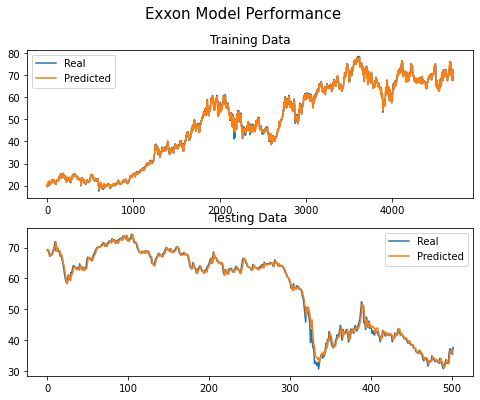

In [6]:
mseTrain, trainPreds, trainTruth = mse(xTrain,yTrain, model, scaler)
print("MSE Train:", mseTrain)

mseTest, testPreds, testTruth = mse(xTest,yTest, model, scaler)

print("MSE Test:", mseTest)

plot(trainTruth, trainPreds, testTruth, testPreds, 'Exxon Model Performance')

Looking at the above results, we can see reasonable performance, though clearly not as good as we saw with Forward Industries.  However this is not particularly surprising.  Lets see how often we guess correctly.

In [7]:
tradingActionsTrain, tradingActionsTest = createUsableDF(data,scaler, model)

In [8]:
print("Training Score:", score(tradingActionsTrain.copy()))
print("Test Score:", score(tradingActionsTest.copy()))

Training Score: 0.5071110167692634
Test Score: 0.5378486055776892


We can see that we are slightly better than guessing on the training data.  Lets see if we can boost it.

In [9]:
boostModel(tradingActionsTrain, tradingActionsTest)

,Open,residuals,predicted,tomorrow,action,movingResidual,predictedTomorrow
Date,,,,,,,
2018-11-19,69.336528,-0.425395,68.911133,69.165230,buy,-0.197696,69.362926
2018-11-20,69.301179,-0.135950,69.165230,69.185806,buy,-0.191642,69.377448
2018-11-21,68.426295,0.759511,69.185806,68.341164,buy,-0.198053,68.539217
2018-11-23,67.206770,1.134393,68.341164,67.361252,buy,-0.195503,67.556755
2018-11-26,67.374677,-0.013425,67.361252,67.433655,buy,-0.186370,67.620025
...,...,...,...,...,...,...,...
2020-11-10,37.049999,-2.038158,35.011841,36.458382,sell,0.343573,36.114809
2020-11-11,37.090000,-0.631618,36.458382,36.764824,sell,0.319706,36.445118
2020-11-12,35.860001,0.904823,36.764824,35.983673,sell,0.300584,35.683089


It appears that boosting did not have much of an effect.  In fact it slightly decreased the model performance.

In [10]:
tradingActionsFinal = tradingActionsTest[['Open', 'predictedTomorrow', 'action']]
tradingActionsFinal = tradingActionsFinal.rename(columns={'action':'predictedAction'})
tradingActionsFinal['predicted'] = tradingActionsFinal['predictedTomorrow'].shift(1)
tradingActionsFinal['stock'] = 'exxon'
tradingActionsFinal

,Open,predictedTomorrow,predictedAction,predicted,stock
Date,,,,,
2018-11-19,69.336528,69.362926,buy,NaN,exxon
2018-11-20,69.301179,69.377448,buy,69.362926,exxon
2018-11-21,68.426295,68.539217,buy,69.377448,exxon
2018-11-23,67.206770,67.556755,buy,68.539217,exxon
2018-11-26,67.374677,67.620025,buy,67.556755,exxon
...,...,...,...,...,...
2020-11-10,37.049999,36.114809,sell,34.644305,exxon
2020-11-11,37.090000,36.445118,sell,36.114809,exxon
2020-11-12,35.860001,35.683089,sell,36.445118,exxon


In [11]:
tradingActionsFinal.to_csv('Data/Final Predictions/exxonComplete.csv')